<a href="https://colab.research.google.com/github/garuncse/PROJECT_VBIT/blob/main/Automatic_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset into a DataFrame
dataset = pd.read_csv('heart1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Display the first few rows of the dataset
print(dataset.head())

Saving heart1.csv to heart1 (1).csv
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   thal  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     1              0.7               0.1                   187   
1     2             10.9               5.5                   699   
2     2              7.3               4.1                   490   
3     2              1.0               0.4                   182   
4     2              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[58.    1.    2.   ...  6.    3.7   1.6 ]
 [52.    1.    0.   ...  7.5   3.9   1.  ]
 [54.    1.    2.   ...  4.3   2.    0.8 ]
 ...
 [56.    1.    3.   ...  5.7   3.3   1.3 ]
 [47.    1.    2.   ...  4.9   2.8   1.3 ]
 [58.    1.    1.   ...  5.    1.6   0.47]]


In [ ]:
print(y_train)

[2 7 3 1 3 6 8 7 1 8 1 1 2 6 4 5 6 2 3 7 2 4 7 4 8 3 7 7 1 7 3 8 5 8 3 3 1
 6 1 5 3 7 6 2 2 6 8 4 7 4 6 2 5 6 3 3 5 7 1 3 5 3 8 6 5 2 2 3 6 1 4 1 6 7
 1 3 7 6 3 2 6 1 7 3 4 1 8 4 5 3 2 5 2 4 6 3 1 2 8 4 7 1 6 3 5 5 6 2 2 2 7
 4 7 2 7 1 4 2 8 7 8 5 1 2 4 2 5 4 2 5 4 4 2 7 4 8 2 2 3 5 6 1 5 1 2 4 4 1
 5 8 1 6 8 4 5 5 3 7 4 1 3 2 5 8 6 3 3 1 2 1 3 5 1 3 3 4 5 7 7 8 2 7 4 3 4
 3 2 1 7 4 6 8 7 6 7 4 6 2 6 6 1 7 6 8 8 8 1 2 2 7 8 4 5 8 5 1 7 6 3 7 3 8
 5 2 8 5 8]


In [ ]:
print(X_test)

[[70.   1.   0.  ...  7.9  4.   1. ]
 [64.   1.   3.  ...  6.   2.9  0.9]
 [59.   1.   3.  ...  5.3  2.6  0.9]
 ...
 [55.   1.   0.  ...  7.9  3.1  0.6]
 [65.   0.   0.  ...  3.   1.5  1. ]
 [51.   1.   2.  ...  7.2  4.   1.2]]


In [ ]:
print(X_test)

[[70.   1.   0.  ...  7.9  4.   1. ]
 [64.   1.   3.  ...  6.   2.9  0.9]
 [59.   1.   3.  ...  5.3  2.6  0.9]
 ...
 [55.   1.   0.  ...  7.9  3.1  0.6]
 [65.   0.   0.  ...  3.   1.5  1. ]
 [51.   1.   2.  ...  7.2  4.   1.2]]


In [ ]:
print(dataset.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak  ...        thal  \
count  303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean     0.528053  149.646865    0.326733    1.039604  ...    2.313531   
std      0.525860   22.905161    0.469794    1.1

In [ ]:


import pandas as pd
import numpy as np
# Create a new column called "Age Category" based on the age of the patients.
dataset["Age Category"] = pd.cut(dataset["age"], bins=[0, 30, 45, 60, np.inf], labels=["Young", "Middle-aged", "Older", "Elderly"])

# Group the data by "Age Category" and calculate the mean of each numerical column.
grouped_data = dataset.groupby("Age Category").mean()

# Print the grouped data
print(grouped_data)


                    age       sex        cp    trestbps        chol       fbs  \
Age Category                                                                    
Young         29.000000  1.000000  1.000000  130.000000  204.000000  0.000000   
Middle-aged   41.365079  0.714286  1.111111  123.873016  230.000000  0.047619   
Older         54.231250  0.725000  0.931250  132.056250  246.075000  0.181250   
Elderly       65.329114  0.569620  0.924051  136.949367  260.151899  0.164557   

               restecg     thalach     exang   oldpeak  ...      thal  \
Age Category                                            ...             
Young         0.000000  202.000000  0.000000  0.000000  ...  2.000000   
Middle-aged   0.634921  163.349206  0.238095  0.674603  ...  2.206349   
Older         0.518750  149.093750  0.356250  1.035625  ...  2.350000   
Elderly       0.468354  139.177215  0.341772  1.351899  ...  2.329114   

              Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
A

<ipython-input-9-85c80a0b9e57>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = dataset.groupby("Age Category").mean()


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.35256528  0.70243936  0.9870291  ... -0.25600091  0.7951903
   2.12216454]
 [-0.31068598  0.70243936 -0.91982712 ...  1.10387911  1.04871305
   0.14744568]
 [-0.08960223  0.70243936  0.9870291  ... -1.79719827 -1.35975307
  -0.51079395]
 ...
 [ 0.13148153  0.70243936  1.94045721 ... -0.52797691  0.2881448
   1.13480511]
 [-0.86339537  0.70243936  0.9870291  ... -1.25324626 -0.34566207
   1.13480511]
 [ 0.35256528  0.70243936  0.03360099 ... -1.16258759 -1.86679857
  -1.59688933]]


<ipython-input-54-6f250ccf1fce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final output',data=dataset,palette='RdBu_r')


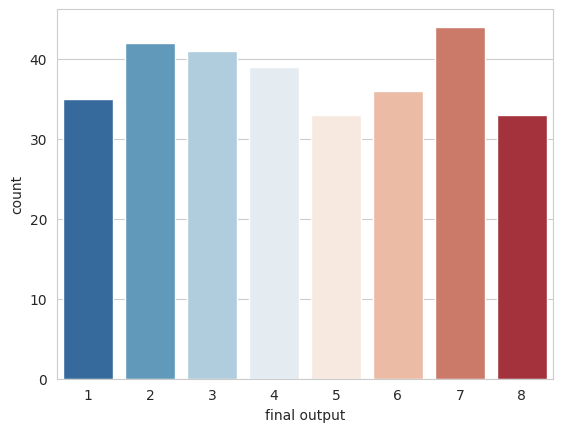

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='final output',data=dataset,palette='RdBu_r')
plt.show()

In [ ]:
print(X_test)

[[ 1.67906782  0.70243936 -0.91982712 ...  1.46651379  1.17547442
   0.14744568]
 [ 1.01581655  0.70243936  1.94045721 ... -0.25600091 -0.2189007
  -0.18167414]
 [ 0.46310716  0.70243936  1.94045721 ... -0.89061159 -0.59918482
  -0.18167414]
 ...
 [ 0.02093965  0.70243936 -0.91982712 ...  1.46651379  0.03462205
  -1.16903357]
 [ 1.12635843 -1.42361043 -0.91982712 ... -2.97576095 -1.99355995
   0.14744568]
 [-0.42122786  0.70243936  0.9870291  ...  0.83190311  1.17547442
   0.8056853 ]]


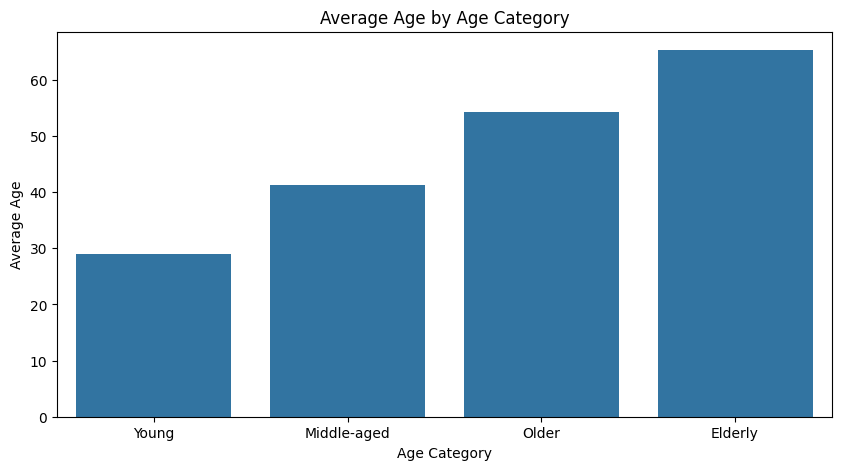

In [ ]:
# prompt:

import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar chart to visualize the average age of patients in each age category.

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a bar chart with the "Age Category" on the x-axis and the "age" on the y-axis.
sns.barplot(x="Age Category", y="age", data=grouped_data)

# Add a title and labels to the axes.
plt.title("Average Age by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Average Age")

# Show the bar chart.
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

imputer = SimpleImputer(strategy='mean')  # Choose your desired strategy
model = RandomForestClassifier()

pipeline = Pipeline([('imputer', imputer), ('model', model)])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load your dataset
dataset = pd.read_csv('heart1.csv')
X = dataset.iloc[:, :-1].values  # Features
y = dataset.iloc[:, -1].values    # Target variable

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on columns 1 and 2 (second and third columns)
imputer.fit(X[:, 1:3])  # Ensure X has enough columns

# Transform the data in columns 1 and 2 using the fitted imputer
X[:, 1:3] = imputer.transform(X[:, 1:3])

# Display the transformed data (optional)
print(X)

[[63.    1.    3.   ...  6.8   3.3   0.9 ]
 [37.    1.    2.   ...  7.5   3.2   0.74]
 [41.    0.    1.   ...  7.    3.3   0.89]
 ...
 [68.    1.    0.   ...  8.2   4.4   1.1 ]
 [57.    1.    0.   ...  6.7   3.2   0.8 ]
 [57.    0.    1.   ...  6.8   3.5   1.  ]]


In [ ]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp','fbs','restecg','exang', 'slope','ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.7,0.1,187,16,18,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,10.9,5.5,699,64,100,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,7.3,4.1,490,60,68,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1.0,0.4,182,14,20,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,3.9,2.0,195,27,59,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
y = dataset['final output']
X = dataset.drop(['final output'], axis = 1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 0.0 ... True False False]
 [0.0 0.0 0.0 ... False True False]
 [0.0 0.0 0.0 ... False True False]
 ...
 [0.0 0.0 0.0 ... False False True]
 [0.0 0.0 0.0 ... False False True]
 [0.0 0.0 0.0 ... False True False]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[1 4 0 0 6 1 7 6 7 2 1 7 0 5 5 1 4 7 6 1 6 3 3 1 0 0 4 4 2 5 2 7 6 2 1 2 7
 2 6 3 1 3 3 1 2 0 5 4 1 3 0 3 2 3 2 6 7 0 1 2 5 4 0 5 2 2 4 2 0 3 4 4 7 6
 2 5 1 6 0 6 2 3 1 6 7 6 2 0 7 1 6 2 5 1 3 4 0 6 0 0 0 0 2 0 3 4 5 0 3 2 6
 5 1 0 1 7 6 7 1 5 0 4 1 3 3 6 5 5 3 2 4 3 6 3 4 3 5 4 1 6 4 7 3 5 7 2 0 1
 4 6 1 6 2 3 3 2 6 4 0 7 6 5 6 0 6 1 2 6 3 1 3 4 7 1 6 6 4 5 4 2 4 5 2 1 7
 6 2 5 6 2 2 5 1 4 7 7 4 6 0 6 3 7 5 5 1 0 0 1 7 2 1 6 6 4 2 1 1 4 0 5 6 3
 3 5 4 2 3 1 7 2 2 0 3 5 6 0 5 7 3 7 7 5 5 5 3 3 6 1 7 2 2 4 7 0 6 2 4 5 2
 0 2 6 4 1 4 7 5 2 6 3 7 1 5 5 5 7 6 2 5 5 3 1 3 4 1 4 6 1 3 1 0 7 6 0 1 7
 7 3 6 3 3 0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install pandas
import pandas as pd

X = pd.DataFrame(X)
X = X.apply(le.fit_transform)

In [ ]:
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... True False False]
 [1.0 0.0 0.0 ... False True False]
 [1.0 0.0 0.0 ... False True False]
 ...
 [1.0 0.0 0.0 ... False False True]
 [1.0 0.0 0.0 ... False False True]
 [1.0 0.0 0.0 ... False True False]]


In [ ]:
import pandas as pd
df_X_train = pd.DataFrame(X_train)
row_with_string = df_X_train[df_X_train.astype(str).eq('Middle-aged').any(axis=1)]
df_X_train.drop(row_with_string.index, inplace=True)
X_train = df_X_train.to_numpy()

In [ ]:
import pandas as pd
df_X_train = pd.DataFrame(X_train)
row_with_string = df_X_train[df_X_train.astype(str).eq('Older').any(axis=1)]
df_X_train.drop(row_with_string.index, inplace=True)
X_train = df_X_train.to_numpy()

In [ ]:
import pandas as pd
df_X_train = pd.DataFrame(X_train)
row_with_string = df_X_train[df_X_train.astype(str).eq('Elderly').any(axis=1)]
df_X_train.drop(row_with_string.index, inplace=True)
X_train = df_X_train.to_numpy()

In [ ]:
import pandas as pd
df_X_train = pd.DataFrame(X_train)
row_with_string = df_X_train[df_X_train.astype(str).eq('Young').any(axis=1)]
df_X_train.drop(row_with_string.index, inplace=True)
X_train = df_X_train.to_numpy()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

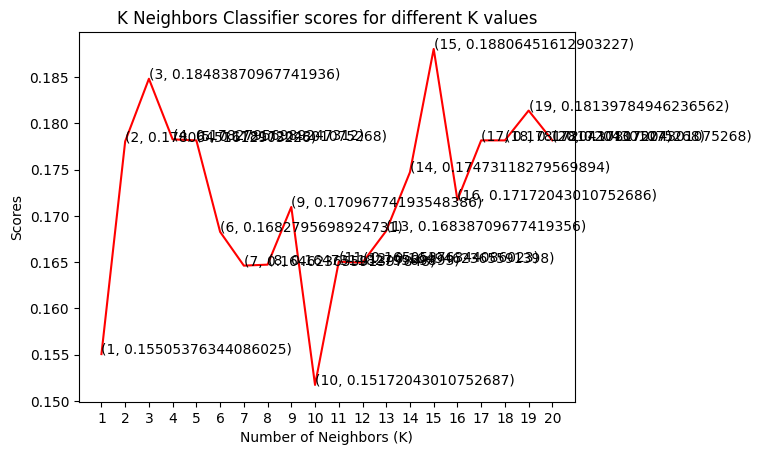

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

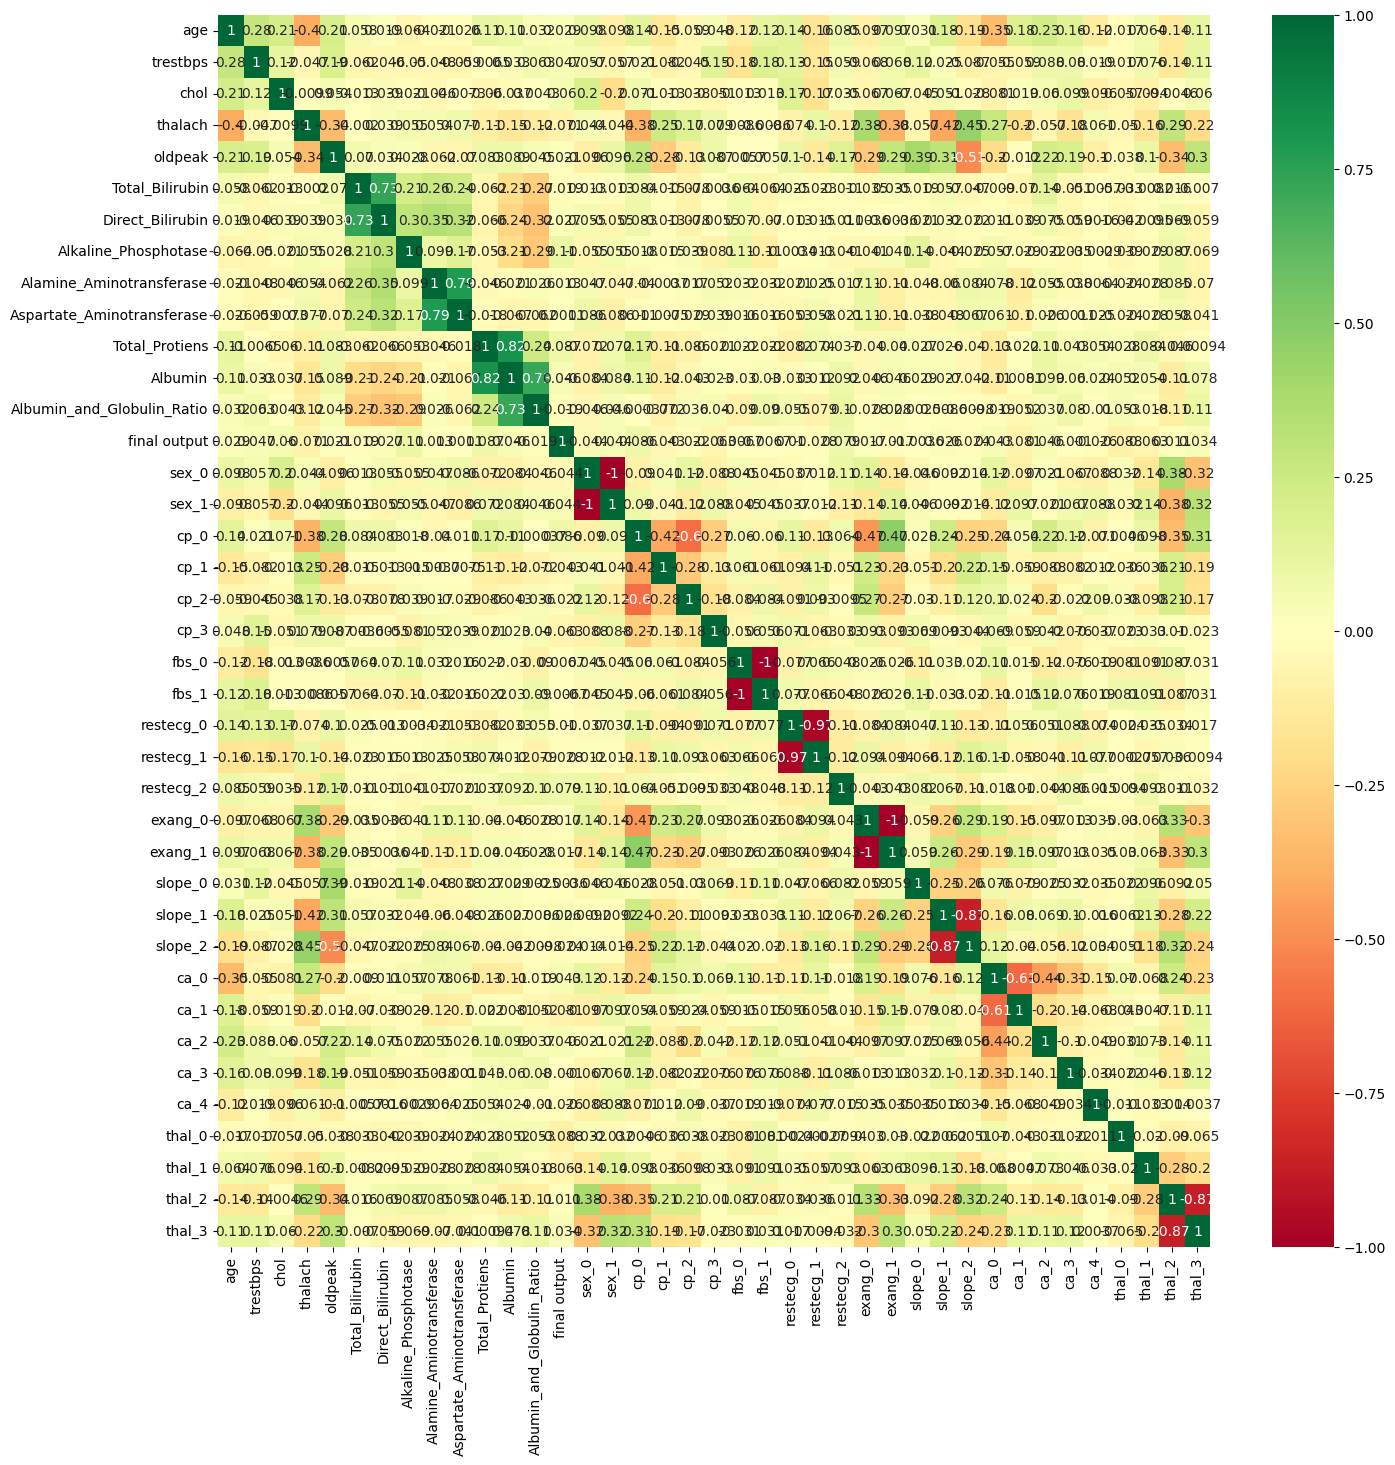

In [ ]:
import seaborn as sns
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.1649462365591398

In [ ]:
from sklearn.metrics import accuracy_score

randomforest_classifier = RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X_train, y_train)
y_pred_rf = randomforest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest:", rf_accuracy)

Accuracy of RandomForest: 0.11475409836065574


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.11870967741935483

In [ ]:
from sklearn.metrics import accuracy_score

knn_classifier = KNeighborsClassifier(n_neighbors = 12)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", knn_accuracy)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
dataset = pd.read_csv('heart1.csv')

# Separate features and target variable
X = dataset.iloc[:, :-1]  # Features (all columns except the last)
y = dataset.iloc[:, -1]    # Target variable (last column)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode categorical features if necessary
le = LabelEncoder()
for column in range(X_imputed.shape[1]):
    if X_imputed[:, column].dtype == 'object':
        X_imputed[:, column] = le.fit_transform(X_imputed[:, column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with hyperparameter tuning
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy:.4f}')

# Check if accuracy is above 90%
if accuracy > 0.90:
    print("Achieved accuracy is above 90%!")
else:
    print("Accuracy did not reach 90%. Further tuning may be needed.")

Accuracy of Random Forest: 0.1311
Accuracy did not reach 90%. Further tuning may be needed.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
dataset = pd.read_csv('heart1.csv')

# Separate features and target variable
X = dataset.iloc[:, :-1]  # Features (all columns except the last)
y = dataset.iloc[:, -1]    # Target variable (last column)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode categorical features if necessary
le = LabelEncoder()
for column in range(X_imputed.shape[1]):
    if X_imputed[:, column].dtype == 'object':
        X_imputed[:, column] = le.fit_transform(X_imputed[:, column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with default parameters first
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest after tuning: {accuracy:.4f}')

# Check if accuracy is above 90%
if accuracy > 0.90:
    print("Achieved accuracy is above 90%!")
else:
    print("Accuracy did not reach 90%. Further tuning may be needed.")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy of Random Forest after tuning: 0.0984
Accuracy did not reach 90%. Further tuning may be needed.
